Loading the Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2

In [ ]:
#conda install -c conda-forge opencv

In [ ]:
import zipfile
with zipfile.ZipFile('./image_classification_data.zip', 'r') as zip_ref:
    zip_ref.extractall('./')
    

In [ ]:
data = pd.read_csv('./image_classification_data/data_labels_mainData.csv')

In [ ]:
data

,InstanceID,patientID,ImageName,cellTypeName,cellType,isCancerous
0,22405,1,22405.png,fibroblast,0,0
1,22406,1,22406.png,fibroblast,0,0
2,22407,1,22407.png,fibroblast,0,0
3,22408,1,22408.png,fibroblast,0,0
4,22409,1,22409.png,fibroblast,0,0
...,...,...,...,...,...,...
9891,1625,60,1625.png,epithelial,2,1
9892,1626,60,1626.png,epithelial,2,1
9893,1627,60,1627.png,epithelial,2,1
9894,1628,60,1628.png,epithelial,2,1


In [ ]:
image_folder = "image_classification_data/patch_images/"


In [ ]:
#Adding image path to the dataframe
data['image_path'] = image_folder + data['ImageName']


In [ ]:
#Storing the image data in a list
def load_image(path):
    with Image.open(path) as img:
        return img

images = [load_image(path) for path in data['image_path']]

In [ ]:
image_dimensions = []

# Iterate through the images
for image_path in data['image_path']:
    with Image.open(image_path) as img:
        # Get the height and width of the image
        width, height = img.size
        image_dimensions.append((width, height))

# Check if all image dimensions are the same
same_dimensions = all(dim == image_dimensions[0] for dim in image_dimensions)

if same_dimensions:
    print("All images have the same dimensions.")
else:
    print("Images have different dimensions.")

All images have the same dimensions.


In [ ]:
channel=[]
for image in images:
    channels = image.mode
    channel.append(channels)
    


In [ ]:
from collections import Counter
counts = Counter(channel)
for element, count in counts.items():
    print(f"{element}: {count}")

RGB: 9896


In [ ]:
data.head()

,InstanceID,patientID,ImageName,cellTypeName,cellType,isCancerous,image_path
0,22405,1,22405.png,fibroblast,0,0,image_classification_data/patch_images/22405.png
1,22406,1,22406.png,fibroblast,0,0,image_classification_data/patch_images/22406.png
2,22407,1,22407.png,fibroblast,0,0,image_classification_data/patch_images/22407.png
3,22408,1,22408.png,fibroblast,0,0,image_classification_data/patch_images/22408.png
4,22409,1,22409.png,fibroblast,0,0,image_classification_data/patch_images/22409.png


In [ ]:
images

[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=27x27>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=27x27>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=27x27>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=27x27>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=27x27>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=27x27>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=27x27>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=27x27>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=27x27>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=27x27>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=27x27>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=27x27>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=27x27>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=27x27>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=27x27>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=27x27>,
 <PIL.Pn

pip install --upgrade Pillow

In [ ]:
#Checking for missing values in the dataset

In [ ]:
data.isnull().sum()

InstanceID      0
patientID       0
ImageName       0
cellTypeName    0
cellType        0
isCancerous     0
image_path      0
dtype: int64

In [ ]:
data.cellTypeName.value_counts()

epithelial      4079
inflammatory    2543
fibroblast      1888
others          1386
Name: cellTypeName, dtype: int64

In [ ]:
data.cellType.value_counts()

2    4079
1    2543
0    1888
3    1386
Name: cellType, dtype: int64

In [ ]:
data.isCancerous.value_counts()

0    5817
1    4079
Name: isCancerous, dtype: int64

<AxesSubplot:>

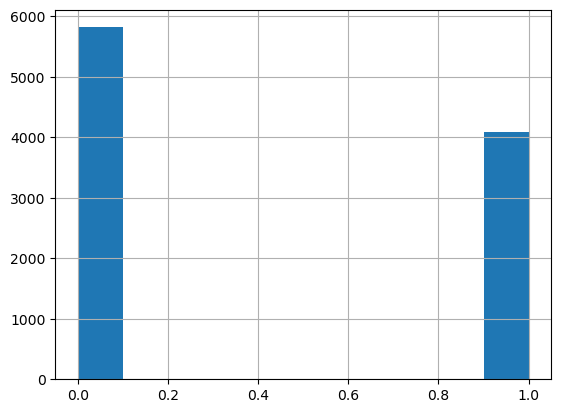

In [ ]:
data.isCancerous.hist()

<AxesSubplot:>

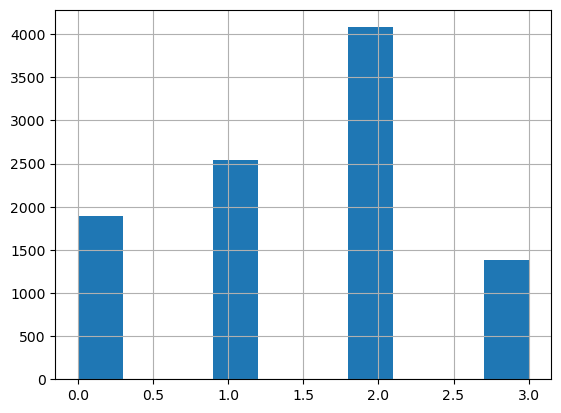

In [ ]:
data.cellType.hist()

dropping patient id as it is not relevant to the findings

In [ ]:
data = data.drop('patientID',axis=1)

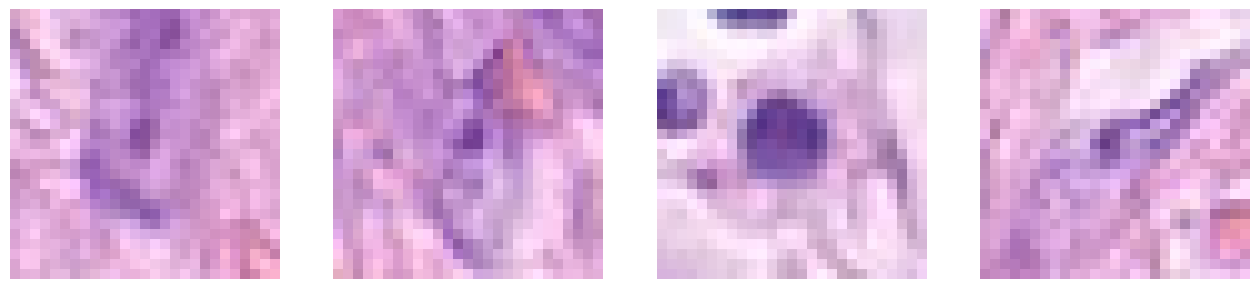

In [ ]:
r_inx = np.random.choice(100, 4)
rand_data = data.loc[r_inx,'image_path']

plt.figure(figsize=(16,4))
for i, image_path in enumerate(rand_data):
    im = np.asarray(Image.open(image_path))
    plt.subplot(1,4,i+1)
    plt.imshow(im,cmap='gray')
    plt.axis('off')
    
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

Splitting into training and test sets

In [ ]:
train_data,test_data = train_test_split(data, test_size=0.2, random_state=42)

In [ ]:
train_data,val_data = train_test_split(train_data, test_size=0.25, random_state=42)

In [ ]:
print("Train data : {}, Val Data: {}, Test Data: {}".format(train_data.shape[0], val_data.shape[0], test_data.shape[0]))

Train data : 5937, Val Data: 1979, Test Data: 1980


Build the Baseline for cellType

In [ ]:
INPUT_DIM = (27,27,3)
HIDDEN_LAYER_DIM = 256
OUTPUT_CLASSES_CELLTYPE = 4

In [ ]:
model_type.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2187)              0         
                                                                 
 dense (Dense)               (None, 256)               560128    
                                                                 
 dense_1 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 561,156
Trainable params: 561,156
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import tensorflow as tf
model_type = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_DIM),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='sigmoid'),
    tf.keras.layers.Dense(OUTPUT_CLASSES_CELLTYPE)
])

2023-05-10 21:26:40.657618: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
model_type.compile(optimizer='SGD',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

In [ ]:
train_data['cellType'] = train_data['cellType'].astype('str')
val_data['cellType'] = val_data['cellType'].astype('str')

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5937 entries, 9533 to 9349
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   InstanceID    5937 non-null   int64 
 1   ImageName     5937 non-null   object
 2   cellTypeName  5937 non-null   object
 3   cellType      5937 non-null   object
 4   isCancerous   5937 non-null   int64 
 5   image_path    5937 non-null   object
dtypes: int64(2), object(4)
memory usage: 324.7+ KB


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=20,  # Randomly rotate images by 20 degrees
    width_shift_range=0.1,  # Randomly shift images horizontally by 10%
    height_shift_range=0.1,  # Randomly shift images vertically by 10%
    zoom_range=0.1,  # Randomly zoom in on images by 10%
    horizontal_flip=True  # Randomly flip images horizontally
)

batch_size = 32

train_generator_type = datagen.flow_from_dataframe(
        dataframe=train_data,
        directory='./',
        x_col="image_path",
        y_col="cellType",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator_type = datagen.flow_from_dataframe(
        dataframe=val_data,
        directory='./',
        x_col="image_path",
        y_col="cellType",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

Found 5937 validated image filenames belonging to 4 classes.
Found 1979 validated image filenames belonging to 4 classes.


In [ ]:
history_type = model_type.fit_generator(train_generator_type, validation_data = validation_generator_type, epochs=50, verbose=0)

/var/folders/sc/1ljq9fgn41xfwkqd6rv0dzgm0000gn/T/ipykernel_31590/4068620594.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_type = model_type.fit_generator(train_generator_type, validation_data = validation_generator_type, epochs=50, verbose=0)


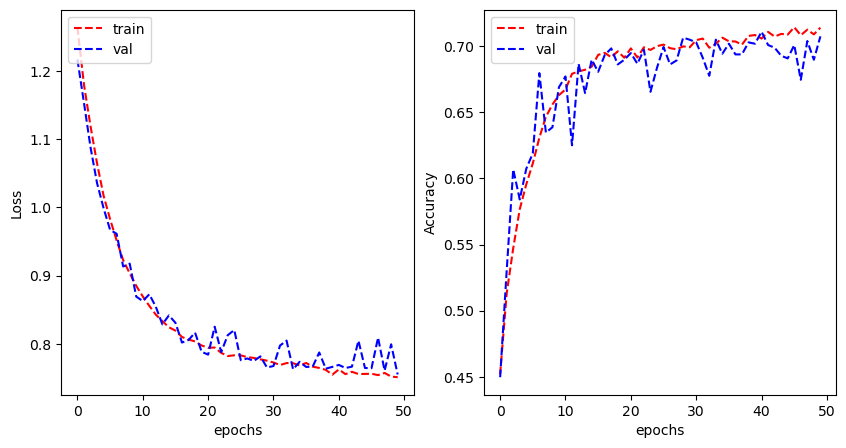

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history_type.history['loss'], 'r--')
plt.plot(history_type.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_type.history['categorical_accuracy'], 'r--')
plt.plot(history_type.history['val_categorical_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.show()

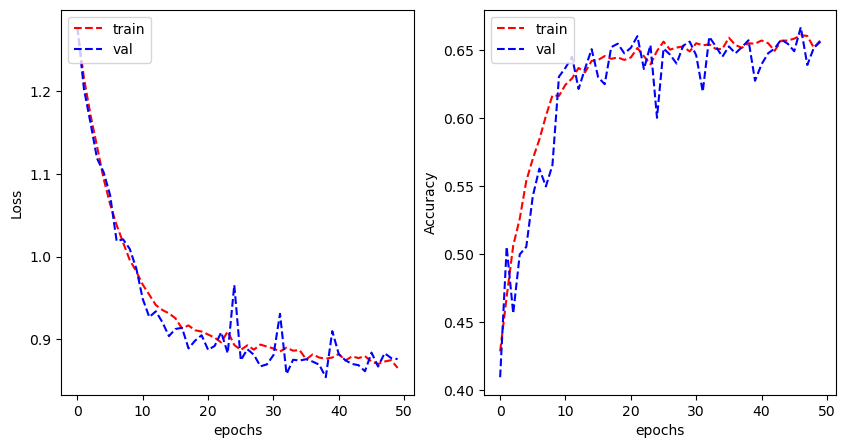

In [ ]:
plt.figure(figsize=(10,5))#with Augmentation 
plt.subplot(1,2,1)
plt.plot(history_type.history['loss'], 'r--')
plt.plot(history_type.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_type.history['categorical_accuracy'], 'r--')
plt.plot(history_type.history['val_categorical_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.show()

Found 1979 validated image filenames belonging to 4 classes.


/var/folders/sc/1ljq9fgn41xfwkqd6rv0dzgm0000gn/T/ipykernel_8273/1492610608.py:11: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred_probs = model_type.predict_generator(test_generator)


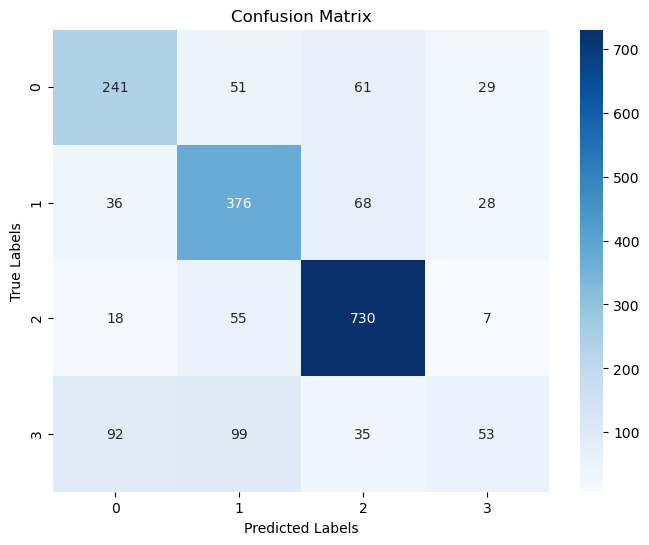

In [ ]:
test_generator = val_datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="cellType",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

y_pred_probs = model_type.predict_generator(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes

confusion_matrix = tf.math.confusion_matrix(y_true_labels, y_pred_labels)


plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Found 1979 validated image filenames belonging to 4 classes.


/var/folders/sc/1ljq9fgn41xfwkqd6rv0dzgm0000gn/T/ipykernel_31590/3542125384.py:11: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred_probs = model_type.predict_generator(test_generator)


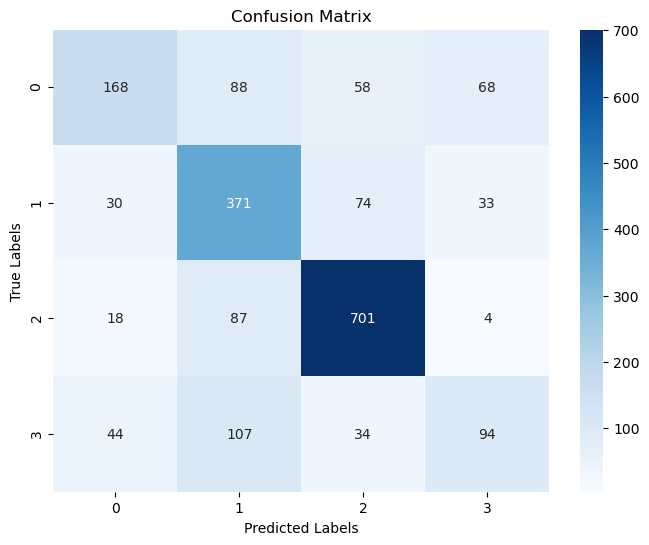

In [ ]:
test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="cellType",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False) #with Augmentation

y_pred_probs = model_type.predict_generator(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes

confusion_matrix = tf.math.confusion_matrix(y_true_labels, y_pred_labels)


plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()